In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
demo = pd.read_csv("shopping_data.csv")
demo= demo.drop('CustomerID',axis=1)
demo= demo.drop('Genre',axis=1)
demo= demo.drop('Age',axis=1)

In [ ]:
demo.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
demo.skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

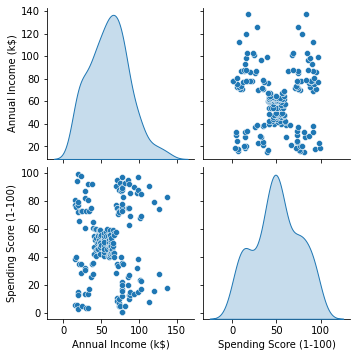

In [ ]:
sns.pairplot(demo,diag_kind='kde')

In [ ]:
powerdemo = pd.DataFrame(pt.fit_transform(demo))
powerdemo.columns= demo.columns
powerdemo.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424
3,-1.930366,1.023549
4,-1.872032,-0.346103


In [ ]:
powerdemo.skew()

Annual Income (k$)       -0.063780
Spending Score (1-100)   -0.223377
dtype: float64

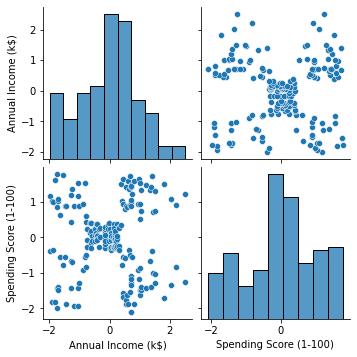

In [ ]:
sns.pairplot(powerdemo,diag_kind='hist')

-0.047220201374263374


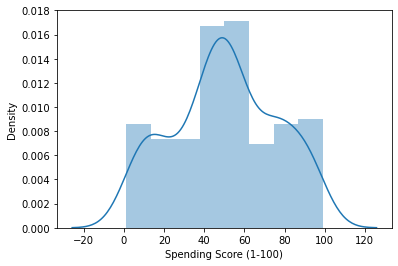

In [ ]:
temp = demo['Spending Score (1-100)']
print(temp.skew())
sns.distplot(temp)

-1.8066668619434074


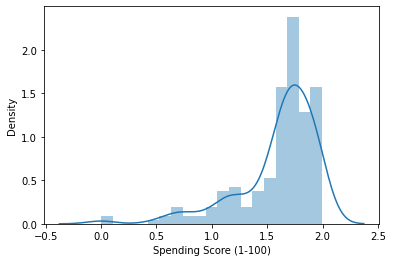

In [ ]:
temp = np.log10(demo['Spending Score (1-100)'])
print(temp.skew())
sns.distplot(temp)

0.3218425498619055


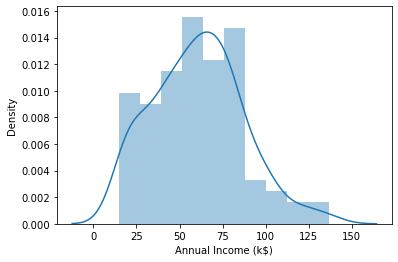

In [ ]:
temp = demo['Annual Income (k$)']
print(temp.skew())
sns.distplot(temp)

-0.7596281254451496


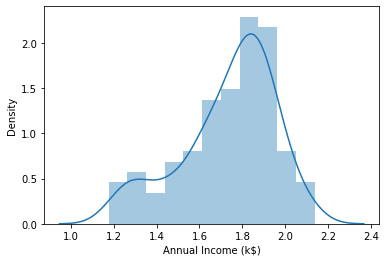

In [ ]:
temp = np.log10(demo['Annual Income (k$)'])
print(temp.skew())
sns.distplot(temp)

In [ ]:
demo = powerdemo

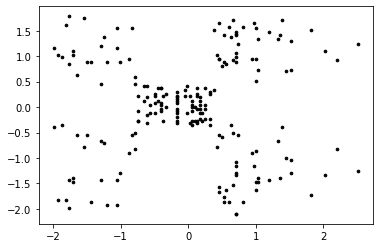

In [ ]:
# Getting the values and plotting it
f1 = demo['Annual Income (k$)'].values
f2 = demo['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [ ]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,400.000000
1,2,266.892051
2,3,164.131751
3,4,108.743952
4,5,61.264301
5,6,52.266038
6,7,46.510109
7,8,41.659824
8,9,31.934359
9,10,28.703289


In [ ]:
errors = clusters_df['cluster_errors']

In [ ]:
for i in range(8):
    print(errors[i+1]-errors[i])

-133.10794914891767
-102.76029955937454
-55.387799367154315
-47.47965077862677
-8.998263065455248
-5.75592881257603
-4.850285555607073
-9.725465053035986


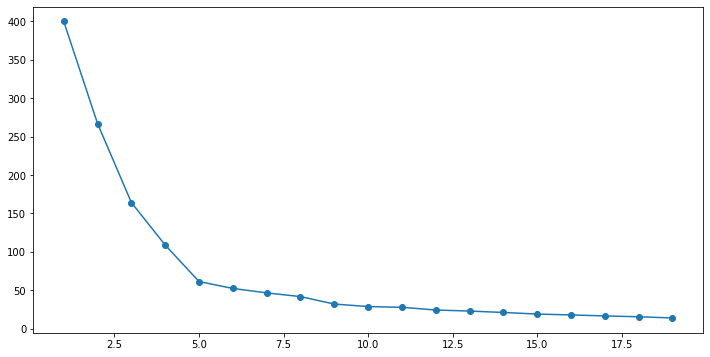

In [ ]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-1.42201891  1.10336508]
 [ 1.02744075 -1.31331302]
 [ 0.97265491  1.20116211]
 [-0.14644306  0.00453909]
 [-1.45022752 -1.21572107]]


In [ ]:
colnames = ["Annual Income (k$)", "Spending Score (1-100)"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [ ]:
X_df.head()

,Annual Income (k$),Spending Score (1-100),group
0,-1.989930,-0.385308,4
1,-1.989930,1.164467,0
2,-1.930366,-1.820424,4
3,-1.930366,1.023549,0
4,-1.872032,-0.346103,4


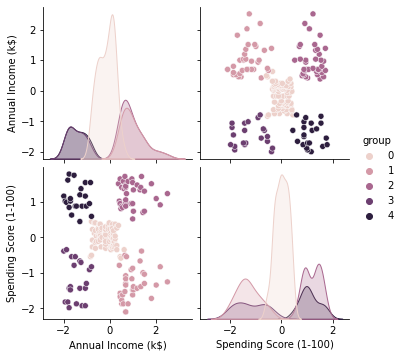

In [ ]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DB5A87400>,
      dtype=object)

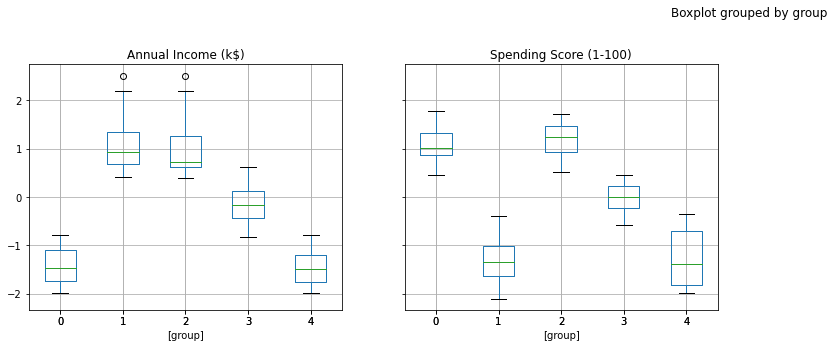

In [ ]:
X_df.boxplot(by = 'group',  layout=(2,4), figsize=(25, 10))

<AxesSubplot:xlabel='group', ylabel='Annual Income (k$)'>

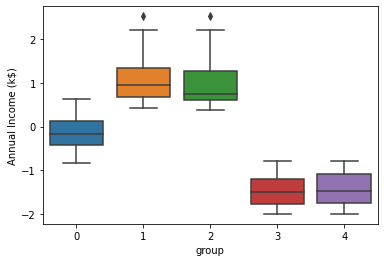

In [ ]:
sns.boxplot(x='group',y='Annual Income (k$)',data=X_df)

<AxesSubplot:xlabel='group', ylabel='Spending Score (1-100)'>

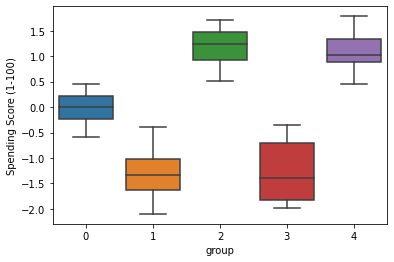

In [ ]:
sns.boxplot(x='group',y='Spending Score (1-100)',data=X_df)

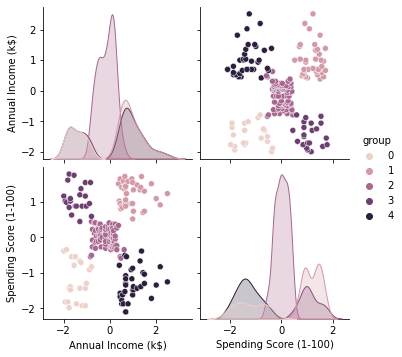

In [ ]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

In [ ]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

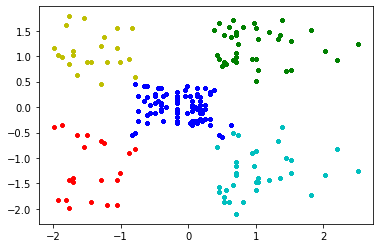

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
